<a href="https://colab.research.google.com/github/chezyio/SC1015_Project/blob/main/SC1015_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Convolutional Neural Network (CNN) Architecture</h1>

<p>Convolutional Neural Networks (CNNs) are a type of neural network that are specifically designed for processing data that has a grid-like structure, such as images, video, and audio. CNNs are commonly used for image classification, object detection, and segmentation tasks.

CNNs consist of several layers of neurons, each of which performs a specific function. The three main types of layers in a CNN are:


Convolutional Layers: These layers apply a set of learnable filters to the input data to extract features that are important for the task at hand. Each filter slides over the input data and performs element-wise multiplication followed by summation to produce a single value, which is then passed through an activation function. The output of a convolutional layer is a set of feature maps that represent different aspects of the input data.


Pooling Layers: These layers downsample the feature maps by taking the maximum, average, or other function of a local region. This reduces the dimensionality of the feature maps while retaining the important information.



Fully Connected Layers: These layers perform a classification or regression task on the features extracted by the previous layers. Each neuron in a fully connected layer is connected to all the neurons in the previous layer.



CNNs are trained using backpropagation and stochastic gradient descent to minimize a loss function. During training, the weights of the filters and the fully connected layers are updated iteratively to improve the network's performance.
</p>

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vkQ0hXDaQv57sALXAJquxA.jpeg'>


<img src='https://miro.medium.com/v2/resize:fit:1052/1*GcI7G-JLAQiEoCON7xFbhg.gif'>

<img src='https://miro.medium.com/v2/resize:fit:1192/format:webp/1*KQIEqhxzICU7thjaQBfPBQ.png'>

<div>
  <h3>Workflow</h3>
  <ol>
    <li>Examine and understand data</li>
    <li>Build input pipeline</li>
    <li>Build model</li>
    <li>Train model</li>
    <li>Test model</li>
    <li>Tune hyperparameters and iterate</li>
  </ol>
</div>
<div>
  <h3>Technical Specifications</h3>

  // EDIT IN PROGRESS

  <p>2 convolutions with max pool after each convolution, use 2 fc to make feature map, 2nd fc has 1 unit becasue it needs to predict if data has pneumonia or not
  
  
  </p>
</div>



<h1>Preamble</h1>

 
<p>Pneumonia is an infection that inflames the air sacs in both lungs. It is one of the leading causes of death in Singapore and worldwide. Accounting for 20.7%, 18.8% and 18.4% of deaths in Singapore in 2019,2020 and 2021 according to the death statistics retrieve from HealthHub. As for worldwide, statistics has shown that 2.5 million people have died from pneumonia in 2019.</p> 
<br>
<p>Pneumonia can be caused by viral, bacterial and fungi. Common pneumonias are contagious and can be spread from person to person or through the contact with surfaces or objects that are contaminated by the bacteria or viruses. One example of a viral infections that can cause pneumonia which is common now is the coronavirus infection </p>
<br>
<p> However upon proper detection and treatment, many cases of pneumonia can be cleared without complications. One of the effective ways to identify signs of an inflammation will be Chest X-ray. Through x-rays, doctors will also be able to know the location and extent of this inflammation. </p>
<br>
<p> For the treatment of mild Pneumonia, it can be easily done through antibiotic, antiviral or antifungal medications.  In the case of any underlining health issues, one might be hospitalized and receive treatments such as respiratory and oxygen therapy and will be required to be injected with antibiotics.  </p>


In [1]:
%%capture
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install keras
!pip install -q kaggle

<h1>Import Libraries</h1>

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout
from keras.models import Sequential, load_model
import cv2
from numpy import asarray


from sklearn.metrics import classification_report, confusion_matrix
import os

In [3]:
# Kaggle API Key
os.environ['KAGGLE_USERNAME'] = "territellis"
os.environ['KAGGLE_KEY'] = "c9fcf5c0a806a25124e165d1530b3d75"

In [4]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:12<00:00, 190MB/s]
100% 2.29G/2.29G [00:12<00:00, 196MB/s]


In [5]:
%%capture
!unzip chest-xray-pneumonia.zip -d chest_xray

<h1>Exploratory Data Analysis</h1>

In [6]:
train = './chest_xray/chest_xray/train/'
test = './chest_xray/chest_xray/test/'
val = './chest_xray/chest_xray/val/'

trainN = train + 'NORMAL/'
trainP = train + 'PNEUMONIA/'

testN = test + 'NORMAL/'
testP = test + 'PNEUMONIA/'

valN = val + 'NORMAL/'
valP = val + 'PNEUMONIA/'

Text(0.5, 1.0, 'Pneumonia')

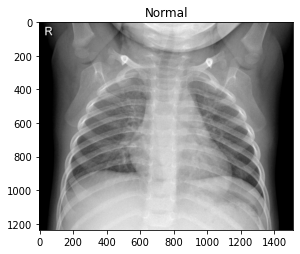

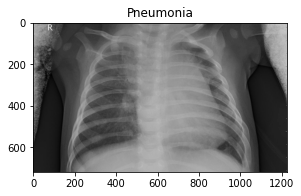

In [24]:
def randomImage(trainSet):
  rand_norm = np.random.randint(0,len(os.listdir(trainSet)))
  pic = os.listdir(trainSet)[rand_norm]
  #print('normal picture title: ', pic)

  pic_add = trainSet+pic

  # rand_p = np.random.randint(0, len(os.listdir(trainP)))

  # pneu_pic = os.listdir(trainP)[rand_p]
  # pneu_pic_add = trainP + pneu_pic
  # print('pneumonia picture title: ', pneu_pic)

  # Load images
  load_image = Image.open(pic_add)
  #pneu_load = Image.open(pneu_pic_add)

  return load_image

f = plt.figure(figsize = (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(randomImage(trainN), cmap='gray')
a1.set_title('Normal')

f2 = plt.figure(figsize =(10,10))
a2 = f2.add_subplot(1,2,1)
img_plot2 = plt.imshow(randomImage(trainP), cmap='gray')
a2.set_title('Pneumonia')

In [27]:
def distPlot(trainSet):
  load_image = randomImage(trainSet)
  load_array = asarray(load_image)
  sns.distplot(load_array.ravel(),
              label=f"Pixel Mean {np.mean(load_image):.3f} & Standard Deviation {np.std(load_image):.3f}", 
              kde=False)
  plt.legend(loc='upper right')
  plt.title('Distribution of Pixel Intensities in the Image')
  plt.xlabel('Pixel Intensity')
  plt.ylabel('# Pixels in Image')

<ipython-input-27-849e797aea26>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(load_array.ravel(),


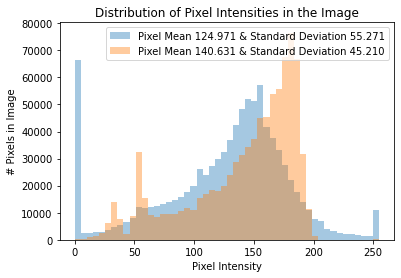

In [28]:
distPlot(trainN)
distPlot(trainP)

There are 5216 images in the training dataset
There are 624 images in the test dataset
There are 16 images in the validation dataset


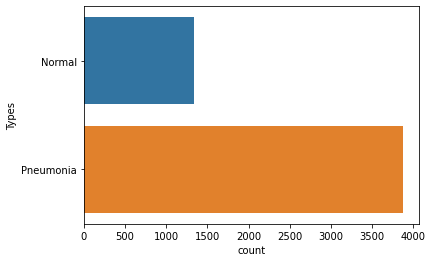

In [10]:
n_count = len(os.listdir(trainN))
p_count = len(os.listdir(trainP))

print("There are {} images in the training dataset".format(len(os.listdir(trainN) + os.listdir(trainP))))
print("There are {} images in the test dataset".format(len(os.listdir(testN) + os.listdir(testP))))
print("There are {} images in the validation dataset".format(len(os.listdir(valN) + os.listdir(valP))))


df = pd.DataFrame({'Types': ['Normal', 'Pneumonia'], 'count':[n_count, p_count]})
sns.barplot(x=df['count'], y=df['Types'], orient='h')
plt.show()

<h1>Image Augmentation and Processing</h1>

<div>
  Notes:
  Can try to augment scale, gaussian blur, etc
</div>

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
['NORMAL', 'PNEUMONIA']
(32, 64, 64, 3)
(32,)


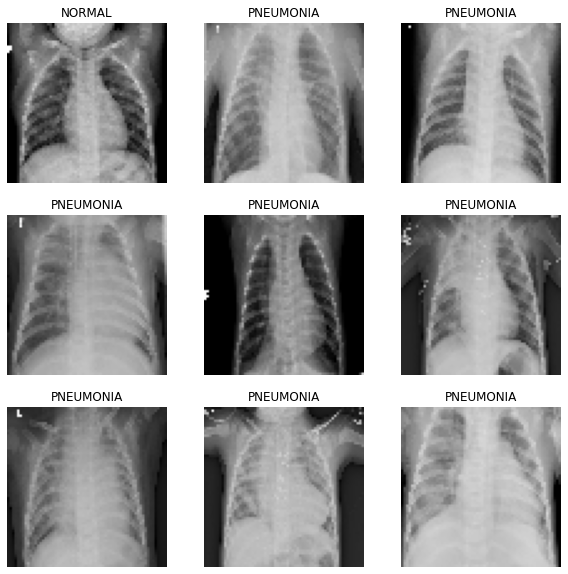

In [12]:
batch_size = 32
img_height = 64
img_width = 64

# tf.keras.utils.image_dataset_from_directory utility will take from a directory of images on disk to a tf.data.Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# used to evaluate accuracy of model
test_ds = tf.keras.utils.image_dataset_from_directory(
  test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  val,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# The image_batch is a tensor of the shape (32, 64, 64, 3). This is a batch of 32 images of shape 64x64x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

<h1>Train Model</h1>

In [13]:
# 2 convolutions with max pool after each convolution
# use 2 fc to make feature map, 2nd fc has 1 unit becasue it needs to predict if data has pneumonia or not

# relu = rectified linear, values would range from 0 to infinity. any negative values would be treated as 0
# sigmoid = values would range from 0 to 1


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
# RandomRotation(0.1),
# RandomZoom(0.1),
# Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # [0,1] range
model = Sequential([
  Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
  MaxPooling2D(pool_size = (2, 2)),
  Dropout(0.2),
  Conv2D(64, (3, 3), activation="relu"),
  MaxPooling2D(pool_size = (2, 2)),
  Dropout(0.2),
  Conv2D(128, (3, 3), activation="relu"),
  MaxPooling2D(pool_size = (2, 2)),
  Dropout(0.2),
  Flatten(),
  Dense(activation = 'relu', units = 128),
  Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [14]:
# train model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
163/163 [==============================] - 75s 271ms/step - loss: 2.4026 - accuracy: 0.7634 - val_loss: 0.7330 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 42s 259ms/step - loss: 0.2216 - accuracy: 0.9116 - val_loss: 0.9696 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 59s 358ms/step - loss: 0.1526 - accuracy: 0.9413 - val_loss: 0.2651 - val_accuracy: 0.8750


KeyboardInterrupt: ignored

<h1>Evaluate Model</h1>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#test_path = val + 'NORMAL/NORMAL2-IM-1438-0001.jpeg'
test_path = val + 'PNEUMONIA/person1949_bacteria_4880.jpeg'

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))


loss, acc = model.evaluate(test_ds)


In [ ]:
# Val Normal Dataset
nVal = [x for x in os.listdir(val + 'NORMAL/')]
count = 1

label = []
for image in nVal:
  imgFilePath = val + 'NORMAL/' + image
  print("\nIMAGE " + str(count) + ": " + image)
  img = tf.keras.utils.load_img(
    imgFilePath, target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  lbl2 = []
  lbl2.append(class_names[np.argmax(score)])
  lbl2.append(100 * np.max(score))
  label.append(lbl2)
  #print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))
  count+=1

plt.figure(figsize=(10,10))
for i in range(len(nVal)):
  loadImg = Image.open(val + 'NORMAL/' + nVal[i])
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(loadImg, cmap='gray')
  plt.title("{} \nconfidence: {:.2f}" .format(label[i][0], label[i][1]))
  plt.axis("off")
    

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(nVal)):
  img = cv2.imread(val + 'NORMAL/' + nVal[i])
  img = cv2.resize(img, (512, 512))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title("{} \nconfidence: {:.2f}" .format(label[i][0], label[i][1]))
  plt.axis("off")

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(nVal)):
  img = cv2.imread(val + 'NORMAL/' + nVal[i])
  img = cv2.resize(img, (512, 512))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  detected_edges = cv2.Canny(img, 80, 100)
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(detected_edges)
  plt.title("{} \nconfidence: {:.2f}" .format(label[i][0], label[i][1]))
  plt.axis("off")

In [ ]:
# Val Pneumonia Dataset
pVal = [p for p in os.listdir(val + 'PNEUMONIA')]
count = 1
label = []
for imagePath in pVal:
  test_path = val + 'PNEUMONIA/' + imagePath
  print("\nIMAGE " + str(count) + ": " + image)
  img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  lbl2 = []
  lbl2.append(class_names[np.argmax(score)])
  lbl2.append(100 * np.max(score))
  label.append(lbl2)
  #print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))
  count+=1

plt.figure(figsize=(10,10))
for i in range(len(nVal)):
  loadImg = Image.open(val + 'PNEUMONIA/' + pVal[i])
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(loadImg, cmap='gray')
  plt.title("{} \nconfidence: {:.2f}" .format(label[i][0], label[i][1]))
  plt.axis("off")